<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Bisection Algorithm

### Modules - Root Finding
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig and Peter Berg
</section>
Last edited: February 23th 2018 
___

### The Task

How can we find the root $x_0$ of a function $f(x)$, i.e.
$$f(x_0) = 0,$$
if we cannot determine it with pencil and paper.

Note that there could be more than one root and we would like to have some control over which root is computed.

### Example

We would like to know where the function $g(x) = x$ intersects the function $h(x) = e^{-x}$. In other words, we need to solve
$$x = e^{-x}.$$
This is equivalent to finding the root of $f(x) = e^{-x} − x = 0:$
$$f(x_0)=e^{−x_0} −x_0 =0.$$
Let us plot the two functions g and h to gauge whether there might be a root and, if so, where approximately.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

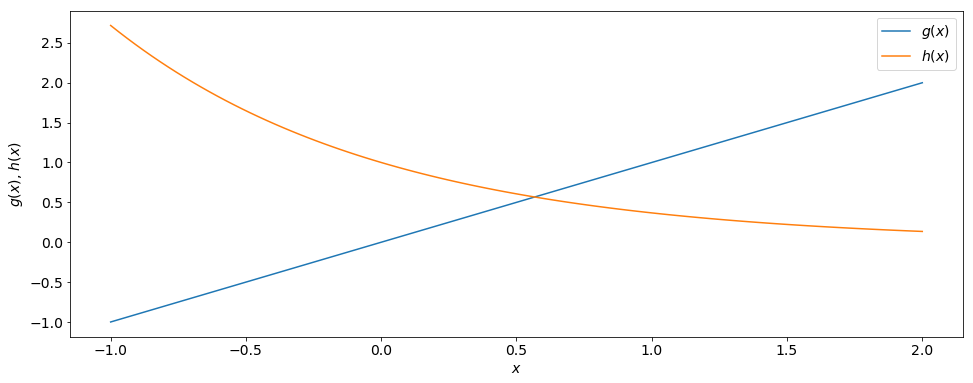

In [3]:
x = np.linspace(-1, 2, 100)
g = x
h = np.exp(-x)

plt.plot(x, g, x, h)
plt.legend([r'$g(x)$', r'$h(x)$'])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$, $h(x)$')
plt.grid();

We see that the intersection appears near $x = 0.6$. Since both $g$ and $h$ are monotonic functions, they only intersect once. Correspondingly, f should have one unique root near x = 0.6, as is shown in the graph below.

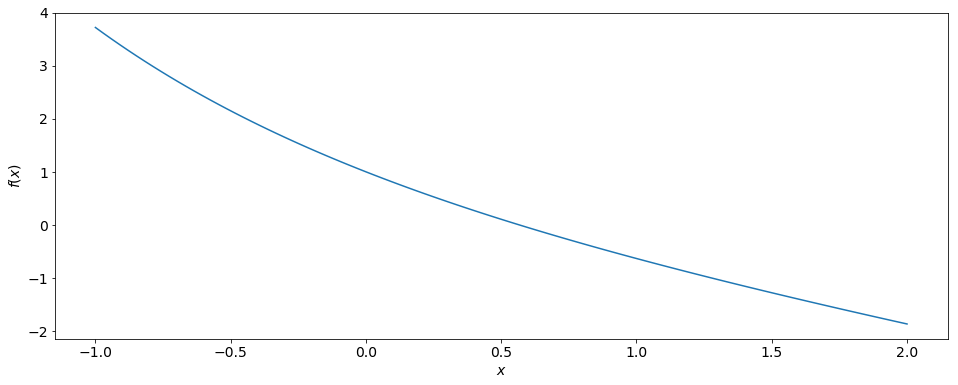

In [4]:
f = np.exp(-x) - x

plt.plot(x, f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid();

How can we find this root?

Well, we know that the root definitely lies between $x = 0$ and $x = 1$ since $f(x)$ is monotonically decreasing and
$$f(0) = 1,$$
and hence positive, and
$$f(1) = \frac{1}{e} − 1 = −0.6321,$$
and hence negative. The root must lie somewhere in between.

The strategy is now to "zero in" on the root by checking values of the function closer and closer to the (unknown) root.

To do so, let’s divide the interval $[0, 1]$ whose endpoints we have just studied, into halves by choosing the midpoint $x = 0.5$. The value of $f$ at the midpoint is
$$f (0.5) = 0.1065,$$
and therefore positive. Since $f(1) < 0$, we now know that the root lies somewhere between $x = 0.5$ and $x = 1$. Similar to the last step, we now choose the midpoint of the interval $[0.5, 1]$ to check the value of the function:
$$f(0.75) = −0.2776.$$
The root must therefore fall within the interval $[0.5, 0.75]$.

We can continue to repeat these steps, resulting in ever smaller intervals in which the root must lie. It can happen, although it is unlikely, that one of the midpoints that we finally choose coincides with the root. This is a highly unusual case though.
We truncate this method when we are satisfied with the precision with which we have determined the root. It is simply given by the width of the last interval. Note that we cannot exceed the machine precision of our computer, setting a limit to our division of intervals.
The above method is called the __bisection algorithm__.

We can now write the bisection algorithm systematically.
Given a (continuous) function $f(x)$, a root, if it exists, can be approximated in the following way:
Find two values $x_p$ and $x_m$ with $f(x_p) > 0$ and $f(x_m) < 0$. Then, follow these steps:
1. Choose the midpoint $x_\mathrm{next} = \frac{x_p+x_m}{2}.$
2. If $f(x_\mathrm{next})$ has the same sign as $f(x_p)$, then we set $x_p = x_\mathrm{next}$.
3. Otherwise, we set $x_m = x_\mathrm{next}$.
4. Repeat the previous three steps until the desired accuracy is reached.

It is as simple as that. Let's determine the root of $f(x)$ up to a given accuracy.

In [5]:
acc = 1e-15  # Root accuracy

x_p = 1      # Starting value x_p
x_m = 0      # Starting value x_m
diff = abs(x_p - x_m)  # Interval length

while diff > acc:
    x_next = (x_p+x_m)/2  # Bisection of interval
    
    f_p = np.exp(-x_p) - x_p          # value of f at x_p
    f_next = np.exp(-x_next) - x_next # Value of f at midpoint
    
    if (f_p*f_next) > 0:
        x_p = x_next
    else:
        x_m = x_next
        
    diff = abs(x_p - x_m)

print(r'The root of f(x) is %f.' % x_p)

The root of f(x) is 0.567143.


### Final Comments

We make no distinction whether $x_p < x_m$ or $x_m < x_p$. It has no bearing on the outcome.
If there are several roots, our initial guess for $x_p$ and $x_m$ will determine what root we will zero in on.
However, one needs to be aware of cases where more than one root lies in our initial interval $[x_p,x_m]$ or $[x_m,x_p]$, respectively.